In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Thu Feb 24 17:11:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip3 install timm
!pip3 install torchio
!pip3 install omegaconf
!pip3 install mmcv

     |████████████████████████████████| 431 kB 7.2 MB/s 
     |████████████████████████████████| 164 kB 8.0 MB/s 
     |████████████████████████████████| 48.4 MB 16 kB/s 
     |████████████████████████████████| 74 kB 2.6 MB/s 
     |████████████████████████████████| 112 kB 14.6 MB/s 
     |████████████████████████████████| 596 kB 51.5 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=cecbfb678f348eb941d8aa02774a54772d7d4889a11806d296d37768d30e5d33
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


     |████████████████████████████████| 420 kB 7.7 MB/s 
     |████████████████████████████████| 190 kB 53.3 MB/s 
  Created wheel for mmcv: filename=mmcv-1.4.5-py2.py3-none-any.whl size=627495 sha256=81cab3e9f21328cf11566522f94ac74754798605b3207489f4e14ba9e8123fa9
  Stored in directory: /root/.cache/pip/wheels/5b/79/26/96dfa214aed0504e9df1569a53474cf505075d5510343f38cf
Successfully built mmcv


In [1]:
%cd '/content/drive/MyDrive/COViT++'
import os
import time
import random
import math
import torch
import numpy as np
from omegaconf import OmegaConf

import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

from model.linear_super import LinearSuper
from model.lrsa_super import AttentionSuper
from model.layernorm_super import LayerNormSuper
from model.embedding_super import OverlapPatchembedSuper

from model.tfm_encoder_super import TransformerEncoderLayer

from model.supernet import PVTSuper
from supernet_train.supernet_engine import engine

from dataloader_n_aug.dataloader import get_test_data

from utils.utils import *
from utils.metric import MetricTracker
from utils.flops import get_flops

/content/drive/MyDrive/COViT++
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


# SUPERNET

In [ ]:
torch.cuda.empty_cache()
engine()

Data collected! /content/drive/MyDrive/COViT++/data/train_split.txt


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Data collected! /content/drive/MyDrive/COViT++/data/test_split.txt
Teacher model checkpoint dist contains:  dict_keys(['epoch', 'state_dict', 'optimizer', 'scheduler', 'loss'])
Create optimizer Adam with lr:  0.0003
 - SAMPLED model config: {'embed_dims': [16, 32, 80, 128], 'depths': [3, 2, 6, 2], 'sample_pooling_dim': 15}
 - SAMPLED model parameters: 5139475
!!! RESUME TRAINING !!!
Checkpoint model dist contains:  dict_keys(['model', 'optimizer', 'lr_scheduler', 'epoch', 'scaler'])
Current learning rate:  3.75e-05
!!! Start training !!!


Training for eps: 10:   0%|          | 0/468 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control points or a smaller maximum displacement
  warnings.warn(message, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control points or a smaller maximum displacement
  warnings.warn(message, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control p

Train Sample [ 2000/ 7488]	 loss  0.2988	acc  0.9435	


Training for eps: 10:  54%|█████▎    | 251/468 [16:59<16:22,  4.53s/it]

Train Sample [ 4000/ 7488]	 loss  0.2879	acc  0.9537	


Training for eps: 10:  80%|████████  | 376/468 [26:22<06:51,  4.48s/it]

Train Sample [ 6000/ 7488]	 loss  0.2786	acc  0.9574	


Training for eps: 10: 100%|██████████| 468/468 [33:14<00:00,  4.26s/it]


train Summary  Epoch: [10/30]	 loss  0.2774	acc  0.9570	
- Accuracy of the network on train images: 0.9570
 - Sampled model config: {'embed_dims': [16, 32, 80, 128], 'depths': [3, 2, 6, 2], 'sample_pooling_dim': 15}
 - Sampled model parameters: 5139475


Evaluate for epoch 10:   0%|          | 0/14 [00:00<?, ?it/s]/content/drive/MyDrive/COViT++/supernet_train/supernet_train.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ground_truths = torch.tensor(targets, dtype=torch.long).to(device, non_blocking=True)
/content/drive/MyDrive/COViT++/supernet_train/supernet_train.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predictions = torch.tensor(torch.argmax(outputs, dim=1), dtype=torch.float32)
Evaluate for epoch 10: 100%|██████████| 14/14 [00:54<00:00,  3.89s/it]


validation Summary  Epoch: [10/30]	 loss  0.4878	acc  0.8067	
Sens: [0.83809525 0.87       0.7616823 ] , PPV: [0.7719298  0.66923076 0.93142855]
- Accuracy of the network on test images: 0.8067
 ** Max accuracy: 0.8067
Training time 0:34:11
----------------------------------------------------------------------


Training for eps: 11:   0%|          | 0/468 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control points or a smaller maximum displacement
  warnings.warn(message, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control points or a smaller maximum displacement
  warnings.warn(message, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control p

Train Sample [ 2000/ 7488]	 loss  0.2807	acc  0.9439	


Training for eps: 11:  54%|█████▎    | 251/468 [18:39<15:52,  4.39s/it]

Train Sample [ 4000/ 7488]	 loss  0.2699	acc  0.9547	


Training for eps: 11:  80%|████████  | 376/468 [27:42<06:05,  3.97s/it]

Train Sample [ 6000/ 7488]	 loss  0.2635	acc  0.9558	


Training for eps: 11: 100%|██████████| 468/468 [33:38<00:00,  4.31s/it]


train Summary  Epoch: [11/30]	 loss  0.2627	acc  0.9562	
- Accuracy of the network on train images: 0.9562
 - Sampled model config: {'embed_dims': [16, 32, 80, 128], 'depths': [3, 2, 6, 2], 'sample_pooling_dim': 15}
 - Sampled model parameters: 5139475


Evaluate for epoch 11: 100%|██████████| 14/14 [00:46<00:00,  3.33s/it]


validation Summary  Epoch: [11/30]	 loss  0.4875	acc  0.8126	
Sens: [0.8666667 0.86      0.7757009] , PPV: [0.7583333 0.699187  0.9431818]
- Accuracy of the network on test images: 0.8126
 ** Max accuracy: 0.8126
Training time 1:08:38
----------------------------------------------------------------------


Training for eps: 12:   0%|          | 0/468 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control points or a smaller maximum displacement
  warnings.warn(message, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control points or a smaller maximum displacement
  warnings.warn(message, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control p

Train Sample [ 2000/ 7488]	 loss  0.2726	acc  0.9474	


Training for eps: 12:  54%|█████▎    | 251/468 [16:29<14:19,  3.96s/it]

Train Sample [ 4000/ 7488]	 loss  0.2636	acc  0.9572	


Training for eps: 12:  80%|████████  | 376/468 [24:54<05:58,  3.89s/it]

Train Sample [ 6000/ 7488]	 loss  0.2576	acc  0.9609	


Training for eps: 12: 100%|██████████| 468/468 [30:58<00:00,  3.97s/it]


train Summary  Epoch: [12/30]	 loss  0.2575	acc  0.9594	
Epoch    13: reducing learning rate of group 0 to 1.8750e-05.
- Accuracy of the network on train images: 0.9594
 - Sampled model config: {'embed_dims': [16, 32, 80, 128], 'depths': [3, 2, 6, 2], 'sample_pooling_dim': 15}
 - Sampled model parameters: 5139475


Evaluate for epoch 12: 100%|██████████| 14/14 [00:45<00:00,  3.25s/it]


validation Summary  Epoch: [12/30]	 loss  0.4687	acc  0.8146	
Sens: [0.7809524 0.82      0.8364486] , PPV: [0.7735849 0.7387387 0.8861386]
- Accuracy of the network on test images: 0.8146
 ** Max accuracy: 0.8146
Training time 1:40:24
----------------------------------------------------------------------


Training for eps: 13:   0%|          | 0/468 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control points or a smaller maximum displacement
  warnings.warn(message, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control points or a smaller maximum displacement
  warnings.warn(message, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control p

Train Sample [ 2000/ 7488]	 loss  0.2715	acc  0.9519	


Training for eps: 13:  54%|█████▎    | 251/468 [19:08<15:57,  4.41s/it]

Train Sample [ 4000/ 7488]	 loss  0.2632	acc  0.9594	


Training for eps: 13:  80%|████████  | 376/468 [28:04<06:59,  4.56s/it]

Train Sample [ 6000/ 7488]	 loss  0.2573	acc  0.9606	


Training for eps: 13: 100%|██████████| 468/468 [34:53<00:00,  4.47s/it]


train Summary  Epoch: [13/30]	 loss  0.2572	acc  0.9603	
- Accuracy of the network on train images: 0.9603
 - Sampled model config: {'embed_dims': [16, 32, 80, 128], 'depths': [3, 2, 6, 2], 'sample_pooling_dim': 15}
 - Sampled model parameters: 5139475


Evaluate for epoch 13: 100%|██████████| 14/14 [00:49<00:00,  3.55s/it]


validation Summary  Epoch: [13/30]	 loss  0.4714	acc  0.8156	
Sens: [0.8666667  0.87       0.77102804] , PPV: [0.7583333  0.7016129  0.94285715]
- Accuracy of the network on test images: 0.8156
 ** Max accuracy: 0.8156
Training time 2:16:09
----------------------------------------------------------------------


Training for eps: 14:   0%|          | 0/468 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control points or a smaller maximum displacement
  warnings.warn(message, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control points or a smaller maximum displacement
  warnings.warn(message, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control p

Train Sample [ 2000/ 7488]	 loss  0.2624	acc  0.9499	


Training for eps: 14:  54%|█████▎    | 251/468 [18:23<13:53,  3.84s/it]

Train Sample [ 4000/ 7488]	 loss  0.2542	acc  0.9564	


Training for eps: 14:  80%|████████  | 376/468 [26:34<05:59,  3.91s/it]

Train Sample [ 6000/ 7488]	 loss  0.2493	acc  0.9586	


Training for eps: 14: 100%|██████████| 468/468 [32:37<00:00,  4.18s/it]


train Summary  Epoch: [14/30]	 loss  0.2494	acc  0.9584	
- Accuracy of the network on train images: 0.9584
 - Sampled model config: {'embed_dims': [16, 32, 80, 128], 'depths': [3, 2, 6, 2], 'sample_pooling_dim': 15}
 - Sampled model parameters: 5139475


Evaluate for epoch 14: 100%|██████████| 14/14 [00:39<00:00,  2.85s/it]


validation Summary  Epoch: [14/30]	 loss  0.4693	acc  0.8186	
Sens: [0.83809525 0.87       0.80841124] , PPV: [0.7927928  0.71311474 0.93010753]
- Accuracy of the network on test images: 0.8186
 ** Max accuracy: 0.8186
Training time 2:49:27
----------------------------------------------------------------------


Training for eps: 15:   0%|          | 0/468 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control points or a smaller maximum displacement
  warnings.warn(message, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control points or a smaller maximum displacement
  warnings.warn(message, RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:263: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [2], so folding may occur. Choose fewer control p

Train Sample [ 2000/ 7488]	 loss  0.2583	acc  0.9509	


Training for eps: 15:  54%|█████▎    | 251/468 [16:32<13:25,  3.71s/it]

Train Sample [ 4000/ 7488]	 loss  0.2504	acc  0.9584	


Training for eps: 15:  80%|████████  | 376/468 [24:32<05:55,  3.87s/it]

Train Sample [ 6000/ 7488]	 loss  0.2459	acc  0.9619	


Training for eps: 15: 100%|██████████| 468/468 [30:24<00:00,  3.90s/it]


train Summary  Epoch: [15/30]	 loss  0.2460	acc  0.9619	
Epoch    16: reducing learning rate of group 0 to 9.3750e-06.
- Accuracy of the network on train images: 0.9619
 - Sampled model config: {'embed_dims': [16, 32, 80, 128], 'depths': [3, 2, 6, 2], 'sample_pooling_dim': 15}
 - Sampled model parameters: 5139475


Evaluate for epoch 15:   0%|          | 0/14 [00:00<?, ?it/s]

# EVOLUTION

In [2]:
cwd = os.getcwd()
config_file = 'config/config.yml'
model_config_file = 'config/model_cfg_evolution.yml'

metric_ftns = ['loss', 'acc']
train_metrics = MetricTracker(*[m for m in metric_ftns], mode='train')
valid_metrics = MetricTracker(*[m for m in metric_ftns], mode='validation')

config = OmegaConf.load((os.path.join(cwd, config_file)))['config']
model_cfg = OmegaConf.load((os.path.join(cwd, model_config_file)))

seeding(config)

In [ ]:
cudnn.benchmark = True

data_loader_val = get_test_data(config)

model = PVTSuper(img_size=model_cfg.input_size,
                                    super_embed_dims=[32, 64, 160, 256],\
                                    sample_embed_dims=model_cfg.SUPERNET.EMBED_DIMS,
                                    depths=model_cfg.SUPERNET.DEPTHS,
                                    mlp_ratios=model_cfg.SUPERNET.MLP_RATIOS,
                                    qkv_bias=True,
                                    drop_rate=model_cfg.drop_rate,
                                    attn_drop_rate=model_cfg.attn_drop_rate,
                                    num_classes=config.dataset.num_classes,
                                    num_stages=4)

choices = {'sample_pooling_dim': model_cfg.SEARCH_SPACE.SAMPLE_POOLING_DIM,
               'embed_dims': model_cfg.SEARCH_SPACE.EMBED_DIMS , 'depths': model_cfg.SEARCH_SPACE.DEPTHS}

Data collected! /content/drive/MyDrive/COViT++/data/test_split.txt


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
checkpoint_loader = torch.load(config.resume_training_dir, map_location='cpu')
checkpoint = model.state_dict()

for k, v in checkpoint_loader['model'].items():
    k = k.replace('module.', '')
    checkpoint.update({k: v})

model.load_state_dict(checkpoint, strict=True)

if not os.path.exists(config.resume_training):
    raise ("File doesn't exist {}".format(config.resume_training))

In [ ]:
torch.manual_seed(48)
np.random.seed(48)
random.seed(48)

if (config.cuda):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
else:
    device = torch.device("cpu")

model.to(device)

In [ ]:
from evo_search import EvolutionSearch

t = time.time()

searcher = EvolutionSearch(config=model_cfg, main_config=config, model=model, choices=choices, test_loader=data_loader_val)
searcher.search()

print('Total searching time = {:.2f} hours'.format((time.time() - t) / 3600))

# PARETO FRONT 
**Flops, Params., Acc. and COVID-19-Sens.** 

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


models_8844 = torch.load('/content/drive/MyDrive/COViT++/evo_output_dir/[8, 8, 4, 4]-checkpoint-38.pth')
models_8884 = torch.load('/content/drive/MyDrive/COViT++/evo_output_dir/[8, 8, 8, 4]-checkpoint-41.pth')

print('Number of 8-8-8-4 models: ', len(models_8884['vis_dict']))
print('Number of 8-8-4-4 models: ', len(models_8844['vis_dict']))

Number of 8-8-8-4 models:  687
Number of 8-8-4-4 models:  617


In [57]:
def preprocess_visdict(input_dict):
    visited_dicts = dict()

    for k, v in input_dict.items():
        if len(k) == 9 and all(key in v for key in ('params', 'test_acc', 'visited', 'flops (G)', 'covid_sens')):
            visited_dicts.update({k: v})
    return visited_dicts


def process_df(input_dict):
    input_dict = preprocess_visdict(input_dict)
    return pd.DataFrame(input_dict).transpose()


def top_test_acc(processed_df, spec_a=False, spec_b=False, spec_a_ascending=False, spec_b_ascending=False, sort_2_specs=False):
    if sort_2_specs:
        return processed_df.sort_values([spec_a, spec_b], ascending=[spec_a_ascending, spec_b_ascending]).head(20)
    else:
        return processed_df.sort_values(spec_a, ascending=spec_a_ascending).head(20)


def plot_pareto_frontier(Xs, Ys, ax, maxX=True, maxY=True, titleX='', titleY=''):
    # Pareto frontier selection process
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    
    # Plotting process
    ax.scatter(Xs, Ys)
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    ax.plot(pf_X, pf_Y, '-r', linewidth=4.0)

    ax.set_xlabel(titleX)
    ax.set_ylabel(titleY)


def plot_paretofront(processed_df):
    fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10, 7))

    x = np.real(processed_df['params'])
    y = np.real(processed_df['flops (G)'])
    z = np.real(processed_df['test_acc'])
    t = np.real(processed_df['covid_sens'])

    plot_pareto_frontier(x, z, axes[0][0], maxX=False, maxY=True, titleX='params (M)', titleY='test_acc (%)')
    plot_pareto_frontier(y, z, axes[0][1], maxX=False, maxY=True, titleX='flops (G)', titleY='test_acc (%)')
    plot_pareto_frontier(x, t, axes[1][0], maxX=False, maxY=True, titleX='params (M)', titleY='covid_sens (%)')
    plot_pareto_frontier(y, t, axes[1][1], maxX=False, maxY=True, titleX='flops (G)', titleY='covid_sens (%)')

    fig.tight_layout()
    plt.show()

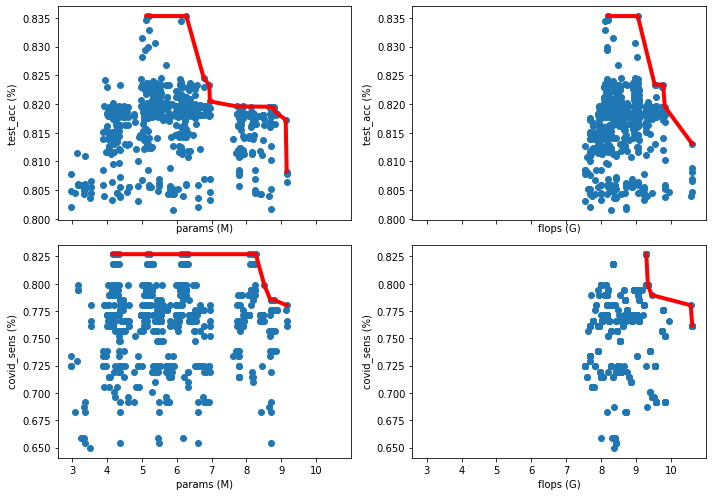

In [58]:
df_8884 = process_df(models_8884['vis_dict'])

plot_paretofront(df_8884)

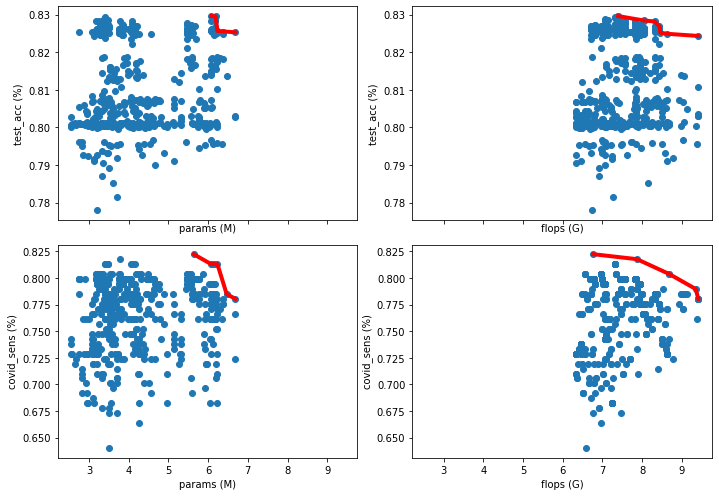

In [59]:
df_8844 = process_df(models_8844['vis_dict'])

plot_paretofront(df_8844)

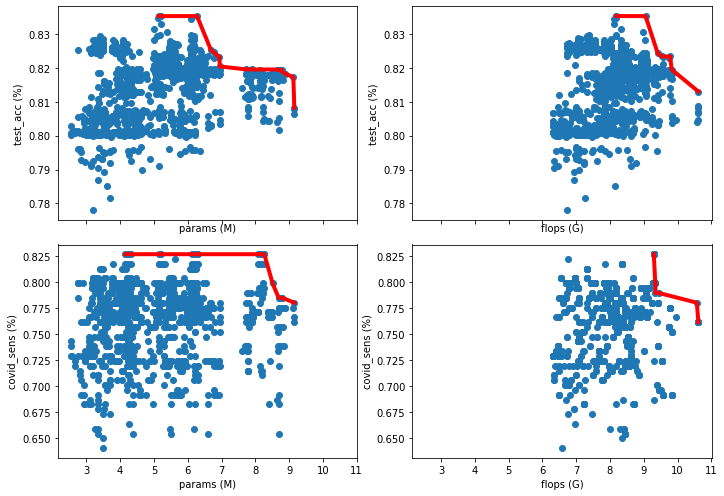

In [60]:
dict_8884 = pd.DataFrame(preprocess_visdict(models_8884['vis_dict'])).transpose()
dict_8844 = pd.DataFrame(preprocess_visdict(models_8844['vis_dict'])).transpose()

dict_8884['8-8-8-4'] = True
dict_8844['8-8-4-4'] = True

df_merged = pd.concat([dict_8884, dict_8844], ignore_index=False).fillna(False)

plot_paretofront(df_merged)

In [37]:
top_test_acc(df_merged, spec_a='test_acc', spec_b='covid_sens', spec_a_ascending=False, spec_b_ascending=False, sort_2_specs=True)

params  test_acc  ...  8-8-8-4  8-8-4-4
31 2 3 6  2 16 32 80  128  5.198435  0.835322  ...     True    False
15 3 2 6  2 16 32 80  128  5.139475  0.835322  ...     True    False
     4 8  2 16 32 80  128  6.276211  0.835322  ...     True    False
   2 2 6  2 16 32 80  128  5.119427  0.834726  ...     True    False
   3 2 8  2 16 16 80  128  6.109907  0.834527  ...     True    False
     3 6  2 16 16 80  128  5.206051  0.832936  ...     True    False
   2 2 6  2 16 64 80  64   5.004547  0.831504  ...     True    False
31 2 2 6  2 16 16 80  256  5.374051  0.830549  ...     True    False
15 3 4 6  2 16 32 80  64   5.166035  0.829867  ...     True    False
   2 2 12 2 16 48 160 64   6.084419  0.829594  ...    False     True
   3 3 12 2 16 48 160 64   6.187619  0.829526  ...    False     True
   2 2 4  2 16 32 160 64   3.393251  0.829356  ...    False     True
   3 3 6  2 16 32 80  64   5.087027  0.829356  ...     True    False
       12 2 16 32 160 64   6.175187  0.828958  ...    False     True
   2 2 4  2 8  32 160 64   3.391155  0.828759  ...    False     True
     3 4  2 8  48 160 64   3.482595  0.828461  ...    False     True
31 2 3 12 2 8  48 160 64   6.165475  0.828427  ...    False     True
15 3 3 12 2 8  32 160 64   6.172043  0.828401  ...    False     True
31 3 2 6  2 8  48 80  64   3.780523  0.828162  ...    False     True
   2 2 4  2 16 32 80  64   3.187491  0.828162  ...    False     True

[20 rows x 7 columns]


**Best model configuration:** 
(15,	3,	2,	6,	2,	16,	32,	80,	128)